# <h1>¿Cuál es el riesgo que representas tú para una empresa de seguros?</h1>


<img src="https://gitlab.com/elkinfernandez21/proyectoartificial/-/raw/master/img/BannerFinal.jpg" width="100%"> <br>




El riesgo está siempre presente en la vida de las personas; se manifiesta en todas las decisiones que se toman a diario y en todas las actividades que se practican, ya sean de carácter profesional o personal. 
- "La palabra riesgo lleva en si idea de Posibilidad de pérdida. Se puede hablar de posibilidades de pérdida y de ganancia. Podríamos referirnos con pleno sentido al riesgo de pérdida, pero nunca lo tendría la frase "Riesgo de ganancia". La palabra riesgo utilizada en su sentido correcto significa posibilidad de sufrir pérdida. La naturaleza de la pérdida física o monetaria es indiferente, pero tiene que darse su Posibilidad, sin ninguna seguridad de que va a Producirse, puesto que allí donde la pérdida es segura no hay riesgo de pérdida, sino certeza. (Por lo tanto para una aseguradora al tener un riesgo mas alto, esto le puede llevar a tomar decisiones en el caso del CU (Costo para el Usuario) que es el precio que pagara la persona que viene a cotizar un seguro, en este caso la empresa de seguros le ofrecera su amparo pero por un precio mas alto)


**Objetivo: Obtener un valor de porcentaje en el riesgo que se toma al cobijar a una persona bajo un seguro contra riesgo de accidente(SOAT)**

In [13]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/ProyectoFinalAI
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/ProyectoFinalAI
/content/drive/My Drive/ProyectoFinalAI


# <h2>Importamos las librerias a trabajar</h2>

In [0]:
!pip install seaborn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import KFold
from sklearn.metrics import *
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import Ridge
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import *
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

# 1.Lectura del Dataset


<p>Trabajando con los datasets de Costos Hospitalarios a causa de un accidente, cada fila del dataset es un registro de una persona involucrada en un accidente y algunas caracteristicas personales, del vehiculo implicado en el accidente, la relacion con respecto a este, la eps donde fue atendido el afectado y entre otras cosas su Condicion de Egreso (Salida de la eps o alta medica)</p>

In [79]:
#Carga de un dataset de costos valores
data2 = pd.read_csv('data/Costos_Hospitalarios.csv')
#Eliminamos la columna del orden
del data2['Numero']
data2.head()

EDAD GRUPO ETAREO  ... MES DE INGRESO IPS ANO INGRESO IPS
0    68     60 y mas  ...              Enero            2018
1    25      19 a 28  ...              Enero            2018
2    20      19 a 28  ...              Enero            2018
3    17      12 a 18  ...              Enero            2018
4    29      29 a 59  ...              Enero            2018

[5 rows x 23 columns]

# 2.Realizando el Preprocesamiento del Dataset





<p>Con respecto a mi dataset tenemos que el total de los datos es de 19643 de esos datos el 5% de estos son nulos o no se tiene un conocimiento claro de ellos, por lo tanto procedimos a eliminarlos y a tratar los otros :</p>



*   Renombramos las columnas para hacerlas mas facil de tratar
*   Eliminamos las columnas que no vamos a usar para el tratamiento de los datos, en este caso solo nos quedamos con las columnas que vamos a tratar, y las que creemos que seran importantes en pocas palabras en la selección fue meramente usada la lógica humana.



In [80]:
#Renombramos las columnas
data2 = data2.dropna()
data2.reset_index(drop=True, inplace=True)
data2 = data2.rename(columns={"GRUPO ETAREO": "RANGO_EDAD","TIPO DE VEHÍCULO": "TIPO_VEHICULO", "DIA SEMANA ACCIDENTE": "DIA_SEMANA", "CONDICION EGRESO": "SALIDA","MES ACCIDENTE": "MES_ACCIDENTE", "RELACION USUARIO/ACCIDENTE": "RELACION_ACCIDENTE"})
data2 = data2.drop(['CURSO DE VIDA', 'CURSO DE VIDA','FECHA DE ACCIDENTE','HORA DE ACCIDENTE','DIA ACCIDENTE','AÑO ACCIDENTE','REQUERIMIENTO DE CX','REFERIDO A OTRA IPS','EPS USUARIO','FECHA DE INGRESO IPS', 'HORA DE INGRESO IPS', 'DIA DE INGRESO IPS','DIA SEMANA DE INGRESO IPS','MES DE INGRESO IPS','ANO INGRESO IPS'], axis=1)
data2.head()

EDAD RANGO_EDAD       SEXO  ... MES_ACCIDENTE SALIDA  COSTOS
0    68   60 y mas  Masculino  ...         Enero   Vivo   60125
1    25    19 a 28   Femenino  ...         Enero   Vivo  112061
2    20    19 a 28  Masculino  ...         Enero   Vivo   54751
3    17    12 a 18  Masculino  ...         Enero   Vivo  444924
4    29    29 a 59   Femenino  ...         Enero   Vivo   55132

[5 rows x 9 columns]

<p>Convertiremos los datos de las columnas de tal forma que puedan ser tratados mas adelante luego de enmascarar mis datos. </p>

- Ahora enmascaramos mis datos de RANGO_EDAD y los categorizamos igual que con el label SEXO, TIPO_VEHICULO, DIA_SEMANA, MES ACCIDENTE y SALIDA para todos estos casos se trabajaran con categorias númericas en este caso.

- Tenemos unos valores que trataremos en este caso debido a que no son nulos y solamente no se tiene informacion de estos, vamos a proceder a indicar los moviles mas comunes, es decir el vehiculo con mayor probabilidad o mas presente en este dataset de accidentes

In [81]:
# Almacenamos el dato de la columna en un RANGO_EDAD
RELACION_ACCIDENTE = data2[["RELACION_ACCIDENTE"]]
RELACION_ACCIDENTE = RELACION_ACCIDENTE.mask(RELACION_ACCIDENTE.RELACION_ACCIDENTE == 'Conductor',0).mask(RELACION_ACCIDENTE.RELACION_ACCIDENTE == 'Peatón',1).mask(RELACION_ACCIDENTE.RELACION_ACCIDENTE == 'Pasajero',2).mask(RELACION_ACCIDENTE.RELACION_ACCIDENTE == 'OCUPANTE',3).mask(RELACION_ACCIDENTE.RELACION_ACCIDENTE == 'Ocupante',3).mask(RELACION_ACCIDENTE.RELACION_ACCIDENTE == 'Ciclista',4).mask(RELACION_ACCIDENTE.RELACION_ACCIDENTE == 'CICLISTA',4).mask(RELACION_ACCIDENTE.RELACION_ACCIDENTE == 'Sin información',0)
RANGO_EDAD = data2[["RANGO_EDAD"]]
RANGO_EDAD = RANGO_EDAD.mask(RANGO_EDAD.RANGO_EDAD == '0 a 6',0).mask(RANGO_EDAD.RANGO_EDAD == '7  a 11',1).mask(RANGO_EDAD.RANGO_EDAD == '12 a 18',2).mask(RANGO_EDAD.RANGO_EDAD == '19 a 28',3).mask(RANGO_EDAD.RANGO_EDAD == '29 a 59',4).mask(RANGO_EDAD.RANGO_EDAD == '60 y mas',5)
SEXO = data2[["SEXO"]]
SEXO = SEXO.mask(SEXO.SEXO == 'Masculino',0).mask(SEXO.SEXO == 'Femenino',1)
TIPO_VEHICULO = data2[["TIPO_VEHICULO"]]
TIPO_VEHICULO = TIPO_VEHICULO.mask(TIPO_VEHICULO.TIPO_VEHICULO == 'Moto',0).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'Carro',1).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'Bus',2).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'BUS',2).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'Camión',3).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'Bicicleta',4).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'Ciclista',4).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'Peatón',5).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'Camioneta',6).mask(TIPO_VEHICULO.TIPO_VEHICULO == 'No aplica',5)
DIA_SEMANA = data2[["DIA_SEMANA"]]
DIA_SEMANA = DIA_SEMANA.mask(DIA_SEMANA.DIA_SEMANA == 'domingo',1).mask(DIA_SEMANA.DIA_SEMANA == 'lunes',2).mask(DIA_SEMANA.DIA_SEMANA == 'martes',3).mask(DIA_SEMANA.DIA_SEMANA == 'miércoles',4).mask(DIA_SEMANA.DIA_SEMANA == 'jueves',5).mask(DIA_SEMANA.DIA_SEMANA == 'viernes',6).mask(DIA_SEMANA.DIA_SEMANA == 'sábado',7).mask(DIA_SEMANA.DIA_SEMANA == '01/06//2018',6).mask(DIA_SEMANA.DIA_SEMANA == '02/06//2018',7).mask(DIA_SEMANA.DIA_SEMANA == '03/06//2018',1).mask(DIA_SEMANA.DIA_SEMANA == '04/06//2018',2).mask(DIA_SEMANA.DIA_SEMANA == '05/06//2018',3).mask(DIA_SEMANA.DIA_SEMANA == '06/06//2018',4).mask(DIA_SEMANA.DIA_SEMANA == '08/06//2018',6).mask(DIA_SEMANA.DIA_SEMANA == '09/06//2018',7).mask(DIA_SEMANA.DIA_SEMANA == '10/06//2018',1).mask(DIA_SEMANA.DIA_SEMANA == '11/06//2018',2).mask(DIA_SEMANA.DIA_SEMANA == '12/06//2018',3).mask(DIA_SEMANA.DIA_SEMANA == '13/06//2018',4).mask(DIA_SEMANA.DIA_SEMANA == '14/06//2018',5).mask(DIA_SEMANA.DIA_SEMANA == '15/06//2018',6).mask(DIA_SEMANA.DIA_SEMANA == '16/06//2018',7).mask(DIA_SEMANA.DIA_SEMANA == '17/06//2018',1).mask(DIA_SEMANA.DIA_SEMANA == '18/06//2018',2).mask(DIA_SEMANA.DIA_SEMANA == '19/06//2018',3).mask(DIA_SEMANA.DIA_SEMANA == '20/06//2018',4).mask(DIA_SEMANA.DIA_SEMANA == '21/06//2018',5).mask(DIA_SEMANA.DIA_SEMANA == '22/06//2018',6).mask(DIA_SEMANA.DIA_SEMANA == '23/06//2018',7).mask(DIA_SEMANA.DIA_SEMANA == '24/06//2018',1).mask(DIA_SEMANA.DIA_SEMANA == '25/06//2018',2).mask(DIA_SEMANA.DIA_SEMANA == '26/06//2018',3).mask(DIA_SEMANA.DIA_SEMANA == '27/06//2018',4).mask(DIA_SEMANA.DIA_SEMANA == '28/06//2018',5).mask(DIA_SEMANA.DIA_SEMANA == '29/06//2018',6)
MES_ACCIDENTE = data2[["MES_ACCIDENTE"]]
MES_ACCIDENTE = MES_ACCIDENTE.mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Enero',1).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Febrero',2).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Marzo',3).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Abril',4).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Mayo',5).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Junio',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Julio',7).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Agosto',8).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Septiembre',9).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Octubre',10).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Noviembre',11).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'Diciembre',12).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'septiembre',9).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'octubre',10).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'noviembre',11).mask(MES_ACCIDENTE.MES_ACCIDENTE == 'diciembre',12).mask(MES_ACCIDENTE.MES_ACCIDENTE == '01/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '02/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '03/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '04/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '05/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '06/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '08/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '09/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '10/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '11/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '12/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '13/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '14/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '15/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '16/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '17/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '18/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '19/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '20/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '21/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '22/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '23/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '24/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '25/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '26/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '27/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '28/06//2018',6).mask(MES_ACCIDENTE.MES_ACCIDENTE == '29/06//2018',6)
SALIDA = data2[["SALIDA"]]
SALIDA = SALIDA.mask(SALIDA.SALIDA == 'Vivo',1).mask(SALIDA.SALIDA == 'Muerto',0)

import collections
u=collections.Counter(TIPO_VEHICULO.values[:,0])
mayor=0
for j in u:
  if u[j]>mayor:
    mayor=u[j]
    key_mayor=j
TIPO_VEHICULO= TIPO_VEHICULO.mask(TIPO_VEHICULO.TIPO_VEHICULO=='Sin información',key_mayor)
TIPO_VEHICULO.TIPO_VEHICULO.unique()


array([0, 1, 2, 3, 4, 5, 6], dtype=object)

<p>Los nuevos datasets obtenidos ahora los reemplazamos en mi dataset original</p>

In [0]:
dataset=data2
dataset["RANGO_EDAD"] = RANGO_EDAD
dataset["SEXO"] = SEXO
dataset["TIPO_VEHICULO"] = TIPO_VEHICULO
dataset["DIA_SEMANA"] = DIA_SEMANA
dataset["MES_ACCIDENTE"] = MES_ACCIDENTE
dataset["SALIDA"] = SALIDA
dataset["RELACION_ACCIDENTE"] = RELACION_ACCIDENTE

<p>Con nuestro dataset armado ahora tenemos un problema los valores de estos estan tipados con string los pasamos a valores numericos</p>

In [83]:
#Diccionario con las conversiones
convert_dict = {'RANGO_EDAD':int,'SEXO':int,'TIPO_VEHICULO':int,'DIA_SEMANA':int,'MES_ACCIDENTE':int,'SALIDA': int, 'RELACION_ACCIDENTE':int}
dataset = dataset.astype(convert_dict)
COSTOS = dataset[["COSTOS"]]
COSTOS['COSTOS'] = COSTOS['COSTOS'].mask(COSTOS.COSTOS == 'ERROR: #N/A',53367)
COSTOS['COSTOS'] = COSTOS['COSTOS'].astype('float64')
dataset["COSTOS"] = COSTOS


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Por último eliminamos los datos de costos 0 ya que estos podrian dañar la precision de mi modelo

In [84]:
indices = dataset[dataset["COSTOS"] == 0].index
data2 = dataset.drop(indices,axis=0)
data2.shape

(14060, 9)

# Análisis de caracteristicas de las gráficas

<p>Con el dataset presentado deseabamos saber que caracteristicas podriamos relacionar con respecto al costo hospitalario en un primer caso, que luego este costo lo trabajariamos como un porcentaje de riesgo normalizandolo entre 0 y 1, en este caso compararmos las variables edad y costo y encontramos una mayor cantidad de registros en los rangos de edad del 2,3,4 a simple vista indicando que podriamos usar esta caracterisiticas para tratar nuestro problema</p>

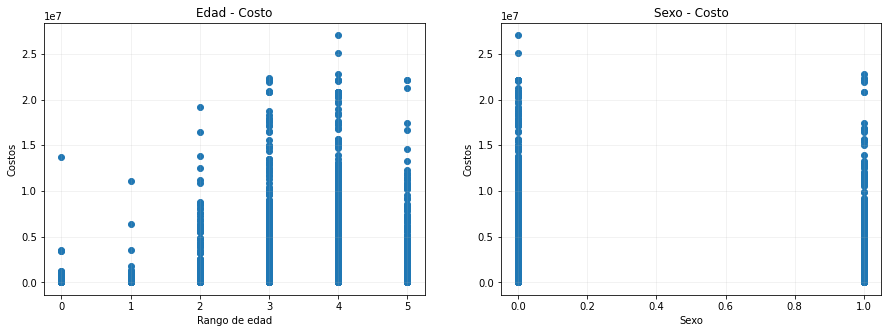

In [85]:
#Edad - Costo

plt.figure(figsize=(15, 5))  
plt.subplot(121)
plt.title("Edad - Costo")
plt.xlabel("Rango de edad")
plt.ylabel("Costos")
plt.grid(alpha=0.2)
plt.scatter(RANGO_EDAD, COSTOS, cmap='rainbow')  
plt.grid(alpha=0.2)

#Sexo - Costos
plt.subplot(122)

plt.title("Sexo - Costo")
plt.xlabel("Sexo")
plt.ylabel("Costos")
plt.grid(alpha=0.2)
plt.scatter(SEXO, COSTOS, cmap='rainbow')  
plt.grid(alpha=0.2)

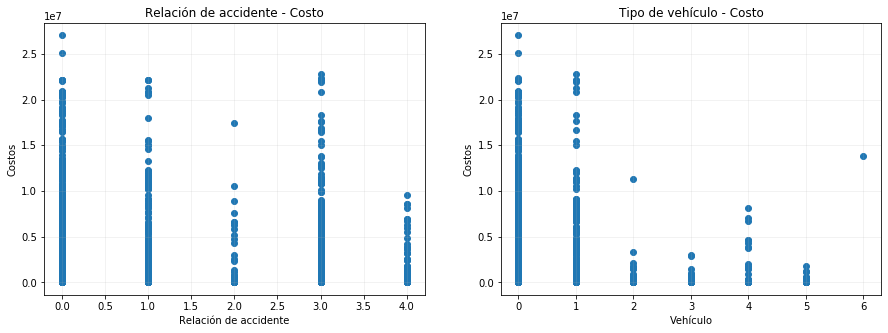

In [0]:
#Relación_accidente - Costos
plt.figure(figsize=(15, 5))  
plt.subplot(121)
plt.title("Relación de accidente - Costo")
plt.xlabel("Relación de accidente")
plt.ylabel("Costos")
plt.grid(alpha=0.2)
plt.scatter(RELACION_ACCIDENTE, COSTOS, cmap='rainbow')  
plt.grid(alpha=0.2)

#Tipo de Vehículo - Costos
plt.subplot(122)
plt.title("Tipo de vehículo - Costo")
plt.xlabel("Vehículo")
plt.ylabel("Costos")
plt.grid(alpha=0.2)
plt.scatter(TIPO_VEHICULO, COSTOS, cmap='rainbow')  
plt.grid(alpha=0.2)

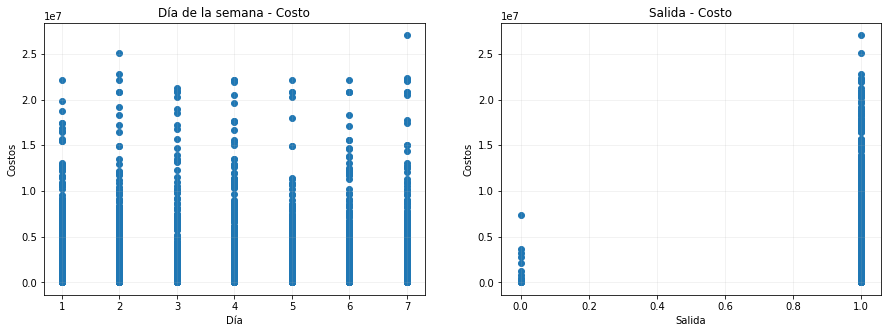

In [0]:
#Día Semana - Costos
plt.figure(figsize=(15, 5))  

plt.subplot(121)
plt.title("Día de la semana - Costo")
plt.xlabel("Día")
plt.ylabel("Costos")
plt.grid(alpha=0.2)
plt.scatter(DIA_SEMANA, COSTOS, cmap='rainbow')  
plt.grid(alpha=0.2)


#Salida - Costos
plt.subplot(122)
plt.title("Salida - Costo")
plt.xlabel("Salida")
plt.ylabel("Costos")
plt.grid(alpha=0.2)
plt.scatter(SALIDA, COSTOS, cmap='rainbow')  
plt.grid(alpha=0.2)

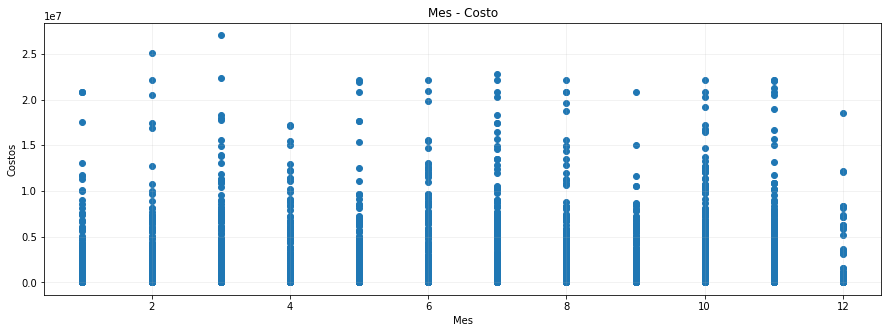

In [0]:
#Mes_accidente - Costos
plt.figure(figsize=(15,5))
plt.title("Mes - Costo")
plt.xlabel("Mes")
plt.ylabel("Costos")
plt.grid(alpha=0.2)
plt.scatter(MES_ACCIDENTE, COSTOS, cmap='rainbow')  
plt.grid(alpha=0.2)

Mirando la distribución conjunta de las variables

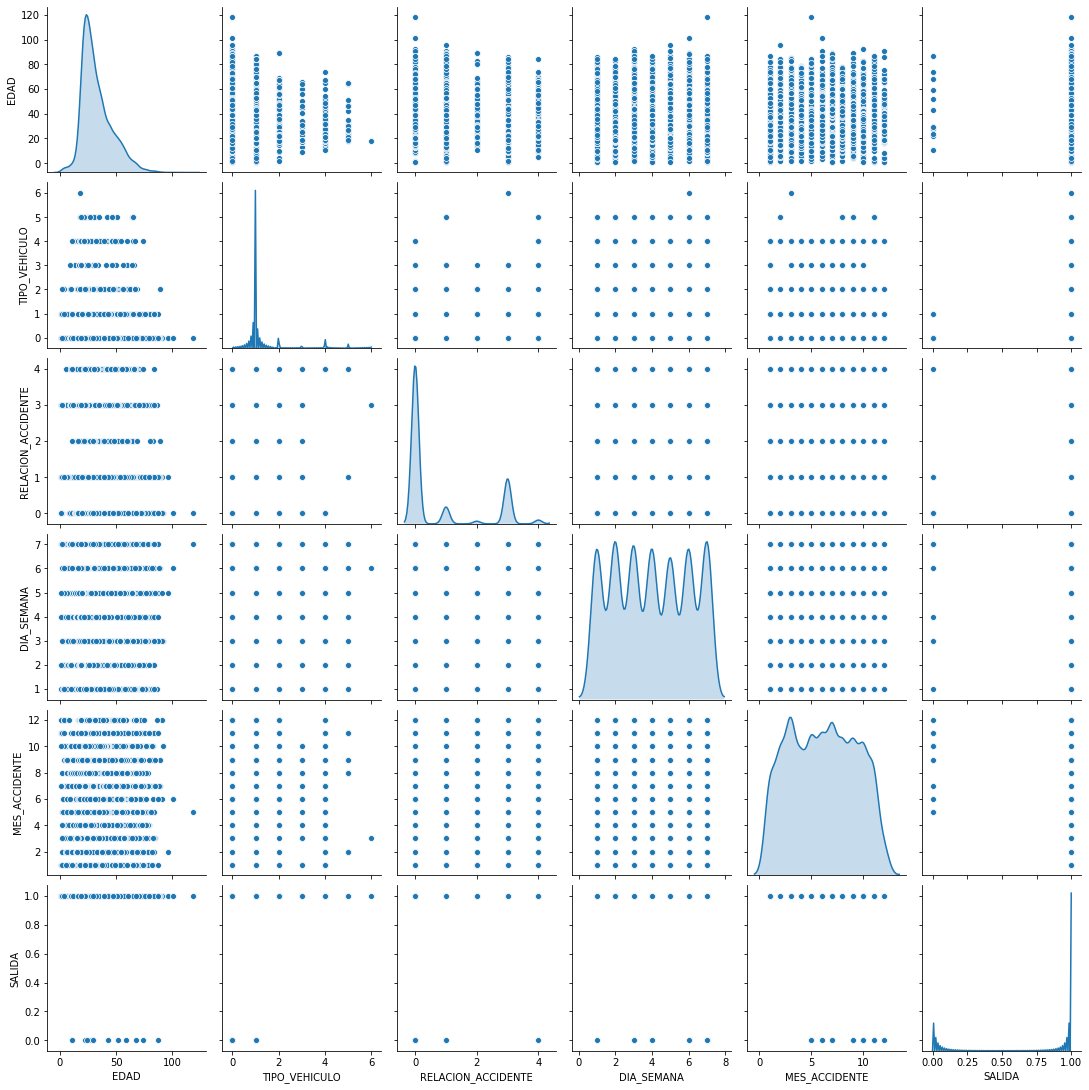

In [0]:
sb.pairplot(data2[['EDAD','TIPO_VEHICULO','RELACION_ACCIDENTE','DIA_SEMANA','MES_ACCIDENTE', 'SALIDA']], diag_kind="kde")

# 3.Escalado de los "y" del dataset


<p>Debido a la gran dispersión de los datos de mi columna de COSTOS, procedimos a realizar un escalado o normalización de estos, se realiza de tal forma que tomamos el valor maximo y el valor minimo de esta columna, Así:

```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```
Pero en este caso, queremos enfocarnos en el riesgo latente de una empresa aseguradora al expedir el SOAT, en este caso con este modelo de regression nos enfocaremos en evaluar las caracteristicas del solicitante, tales como la edad y el rango donde se encuentra la edad, el sexo y tambien con respecto al tipo de vehiculo a evaluar.

La transformación se calcula:
 </p>
```
X_scaled = scale * X + min - X.min(axis=0) * scale
where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
```
Entonces Procedemos a realizar el escalado y transformacion de los valores en mi "y" del dataset.

In [0]:
X = data2.values[:,:-1]
y = data2.values[:,-1]
# print(y.shape, type(y))
y = y.reshape(-1,1)
# print(y.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y = y[:,-1]



# 4.Prediciendo el Riesgo


<h2>Riesgo en las aseguradoras</h2>

<p>La Ley del Contrato de Seguro define el Riesgo como el suceso futuro e incierto que no depende exclusivamente de la voluntad del tomador, del asegurado o del beneficiario, y cuya materialización da origen a la obligación de la empresa de seguros.</p>

<p>Se conocen diversidad de conceptos sobre el riesgo, entre ellos se pueden señalar los siguientes:

- Riesgo es un conjunto de circunstancias que representan una posibilidad de pérdida
- Riesgo es la incertidumbre de que ocurra una pérdida económica
- Riesgo es la posibilidad de que por azar ocurra un hecho que produzca una necesidad patrimonial
- Riesgo es la eventualidad del suceso cuya realización ha de obligar al asegurador a efectuar la prestación que le corresponde</p><br>

<p>Por lo tanto, queremos con los datos dados predecir el porcentaje de riesgo al asegurar a una persona en este caso que este en un vehiculo automotor, de tal manera que, queremos entrenar y mirar los datos que pueden ser utiles en la construccion de este modelo, de tal manera que probaremos todas las caracteristicas usando un clasificador de arbol de regresión y miraremos las 'feature_importances' que son las caracteristicas que mas le aportan a mi modelo de regresion, tambien haremos una tabla comparativa de variables en este caso para mirar que caracteristicas son las adecuadas para mi modelo de predicción.</p>

**Importamos el Árbol Regresor de Decisión y le pasamos mis caracteristicas, usamos el 80% de los datos para entrenar mi modelo y el 20 % para realizar la predicción y prueba.


In [0]:
regressor = DecisionTreeRegressor(max_depth=10)

In [0]:
#Definimos las particiones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Implementamos el GaussianProcessRegressor()
# est = GaussianProcessRegressor()
# est = SVR(kernel='rbf')
# est = SVR(kernel="poly",  degree=3, gamma=2)
# s = cross_val_score(regressor, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_absolute_error))
regressor.fit(X_train,y_train)
print('El error cuadratico medio absoluto')
print ("MSE %.6f"% mean_squared_error(y_test,regressor.predict(X_test))) #Predecimos y comparamos el error medio cuadratico de mis resultados predecidos
# est.fit(X_train,y_train)
# print('Imprimimos el error cuadratico medio')
# print ("MSE %.3f"% mean_absolute_error(y_test, est.predict(X_test)))

El error cuadratico medio absoluto
MSE 0.007407


In [0]:
X_test.shape

(2812, 8)

<h3>Realizando la impresion del porcentaje de las caracteristicas que más influyen en el regresor</h3>

Analizando estas caracteristicas podemos concluir que de mis caracteristicas totales 5 son las que mas importancia tiene el regresor y son las que usaremos para probarlas en mis otros modelos de regresión.

In [0]:
print(regressor.feature_importances_)

[0.33670538 0.01729725 0.03704831 0.08800756 0.08472808 0.22329942
 0.20943146 0.00348252]


# 5.Actualización del dataset


Tomadas con respecto a las caracteristicas que mas influyen para mi predicción

In [87]:
# data2.to_csv(r'data/costoshospitalariostratado.csv', index=False) 
data2 = pd.read_csv('data/costoshospitalariostratado.csv')
data2.head(10)

EDAD  RANGO_EDAD  SEXO  ...  MES_ACCIDENTE  SALIDA     COSTOS
0    68           5     0  ...              1       1    60125.0
1    25           3     1  ...              1       1   112061.0
2    20           3     0  ...              1       1    54751.0
3    17           2     0  ...              1       1   444924.0
4    29           4     1  ...              1       1    55132.0
5    34           4     1  ...              1       1    62438.0
6    22           3     0  ...              1       1    67755.0
7    23           3     0  ...              1       1    70062.0
8    31           4     0  ...              1       1  1488547.0
9    22           3     0  ...              1       1    57097.0

[10 rows x 9 columns]

In [88]:
data2['COSTOS']=y
data2.head(10)

EDAD  RANGO_EDAD  SEXO  ...  MES_ACCIDENTE  SALIDA    COSTOS
0    68           5     0  ...              1       1  0.002213
1    25           3     1  ...              1       1  0.004136
2    20           3     0  ...              1       1  0.002015
3    17           2     0  ...              1       1  0.016456
4    29           4     1  ...              1       1  0.002029
5    34           4     1  ...              1       1  0.002299
6    22           3     0  ...              1       1  0.002496
7    23           3     0  ...              1       1  0.002581
8    31           4     0  ...              1       1  0.055082
9    22           3     0  ...              1       1  0.002101

[10 rows x 9 columns]

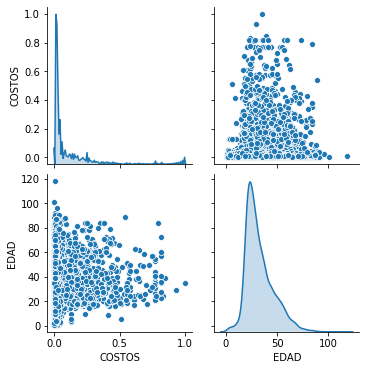

In [89]:
sb.pairplot(data2[['COSTOS','EDAD']], diag_kind="kde")

In [0]:
X = data2.values[:,:-1]
y = data2.values[:,-1]
# print(y.shape, type(y))
y = y.reshape(-1,1)
# print(y.shape)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
y = y[:,-1]


In [95]:
X = data2.values[:,[0,3,4,5,6]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
print(X)

[[68.  0.  0.  1.  1.]
 [25.  0.  0.  2.  1.]
 [20.  0.  0.  4.  1.]
 ...
 [22.  0.  3.  7. 11.]
 [29.  0.  0.  7. 11.]
 [19.  0.  3.  7. 11.]]


In [0]:
print(X_test[0:10])

[[62.  1.  0.  1.  3.]
 [23.  0.  0.  1.  5.]
 [24.  0.  3.  3.  2.]
 [23.  0.  0.  6.  2.]
 [43.  0.  0.  6. 10.]
 [30.  0.  0.  1.  6.]
 [26.  0.  0.  5. 11.]
 [64.  0.  3.  1.  5.]
 [22.  0.  0.  3.  2.]
 [21.  0.  0.  5.  1.]]


Pasamos las caracteristicas mas influyentes ahora a mi regresor

In [0]:
regressor.fit(X_train,y_train)
print('El error cuadratico medio absoluto')
print ("MSE %.6f"% mean_squared_error(y_test,regressor.predict(X_test)))

El error cuadratico medio absoluto
MSE 0.006655


# 6.Comparacion de regresores


Vamos a realizar una comparación de mis modelos de regresión y elegir el mas adecuado, es decir con el que generemos un menor valor de error, en este caso usaremos dos metricas:


*   MSE
*   MAE

Con las comparaciones realizadas concluiremos con que modelos trabajar para realizar la regresión, ahora procederemos a hacer las comparaciones usando un Cross_Validation para comprobar cual es el modelo más preciso y el elegido para tratar este problema.



In [0]:
#Listo mis estimadores
est1 = DecisionTreeRegressor(max_depth=10)
est2 = RandomForestRegressor(n_estimators=100)
est3 = SVR(kernel='linear')
est4 = SVR(kernel='poly')
est5 = SVR(kernel='rbf')
est6 = GaussianProcessRegressor()
est7 = SVR(kernel='sigmoid')



Grafica de la media del error vs n-folds

In [0]:
def show_curve(est,X,y,titulo,metrica):
    means, stds = [], []  #Define dos vectores vacios que almacenaran la media y la desviacion de los datos
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(metrica)) #Usamos la validacion cruzada para un numero de experimentos
        means.append(np.mean(s)) #Almacenamos la media del vector de medias que retorna s por los experimentor realizados en esta caso tendremos que las nfolds son[2 3 4 5 6 7 8 9 10]
        stds.append(np.std(s))   #Almacenamos la media del vector de desviacion estandar que retorna s por los experimentor realizados en esta caso tendremos que las nfolds son[2 3 4 5 6 7 8 9 10]

    means = np.r_[means] #np.r_ une los resultados de las medias es decir los almacena en el vector, los va agregando
    stds  = np.r_[stds]  #np.r_ une los resultados de las desviacion estandar

    plt.plot(nfolds_range, means, label="mean", color="black") #Grafica en x el numero de capas y en y el valor de la media que en este caso va decreciendo
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std") #Colorea la region exterior de la media en este caso la region que comprende la desviacion estandar o los valores que puede tomar
    plt.xlabel("n folds") #numero de capas o experimentos realizados
    plt.ylabel("performance") #Rendimiento o Desempeño
    plt.title(titulo)
    plt.legend()
    return est

Probando con los diferentes estimadores

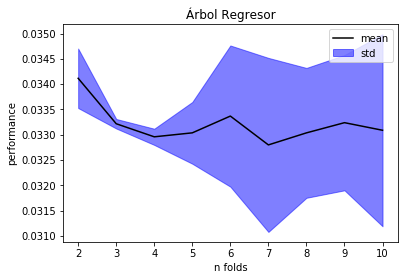

In [0]:
# est1 = show_curve(est1,X,y,'Árbol Regresor', mean_squared_error)
# print(type(est1)) #Con metrica MSE
est1 = show_curve(est1,X,y,'Árbol Regresor', mean_absolute_error)
# print(type(est1)) #Con metrica MAE

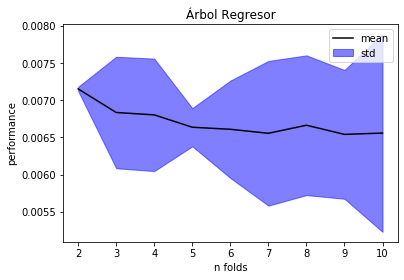

In [0]:
est1 = show_curve(est1,X,y,'Árbol Regresor', mean_squared_error)

In [0]:
est1.fit(X_train,y_train)
predicciones1 = est1.predict(X_test)
# print('Score ',est1.score(X_test,y_test))
print ("MAE %.6f"% mean_absolute_error(y_test, predicciones1))
print ("MSE %.6f"% mean_squared_error(y_test,predicciones1))

MAE 0.033115
MSE 0.006834


<class 'sklearn.ensemble._forest.RandomForestRegressor'>


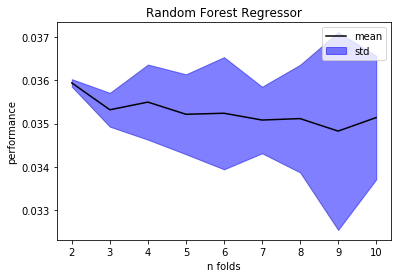

In [0]:
est2 = show_curve(est2,X,y,'Random Forest Regressor',mean_absolute_error)
print(type(est2))

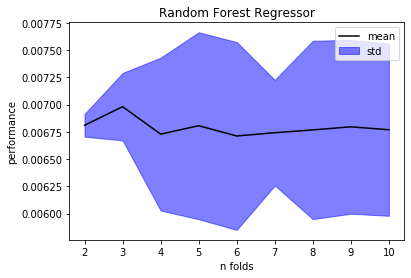

In [0]:
est2 = show_curve(est2,X,y,'Random Forest Regressor', mean_squared_error)

In [0]:
est2.fit(X_train,y_train)
predicciones2 = est2.predict(X_test)
print ("MAE %.6f"% mean_absolute_error(y_test, predicciones2))
print ("MSE %.6f"% mean_squared_error(y_test, predicciones2))

MAE 0.035461
MSE 0.007295


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

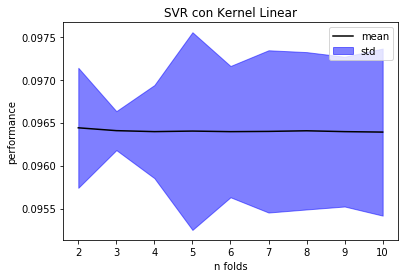

In [0]:
show_curve(est3,X,y,'SVR con Kernel Linear',mean_absolute_error)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

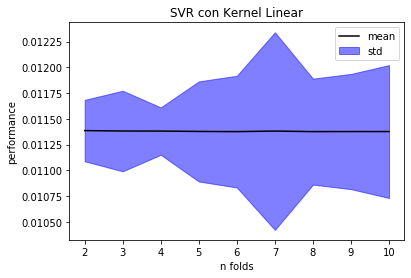

In [0]:
show_curve(est3,X,y,'SVR con Kernel Linear',mean_squared_error)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

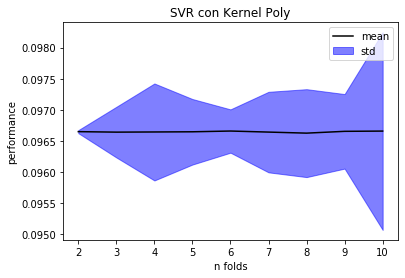

In [0]:
show_curve(est4,X,y,'SVR con Kernel Poly',mean_absolute_error)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

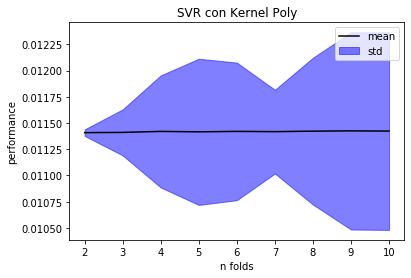

In [0]:
show_curve(est4,X,y,'SVR con Kernel Poly',mean_squared_error)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

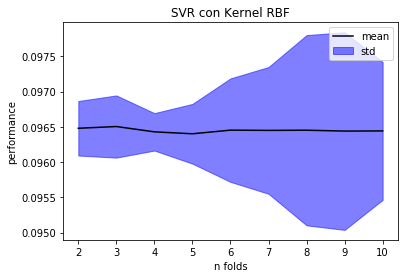

In [0]:
show_curve(est5,X,y,'SVR con Kernel RBF',mean_absolute_error)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

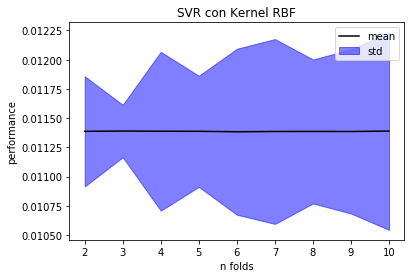

In [0]:
show_curve(est5,X,y,'SVR con Kernel RBF',mean_squared_error)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

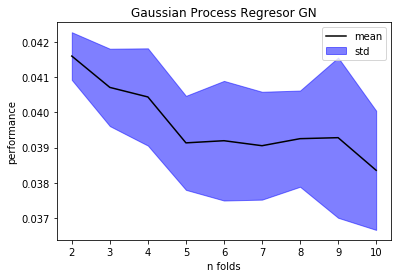

In [0]:
show_curve(est6,X,y,'Gaussian Process Regresor GN',mean_absolute_error)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

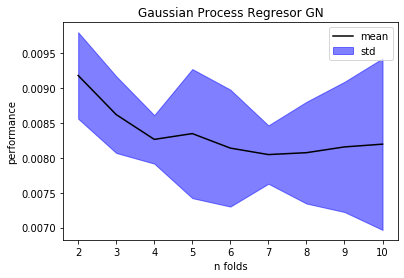

In [0]:
show_curve(est6,X,y,'Gaussian Process Regresor GN',mean_squared_error)

In [0]:
est6.fit(X_train,y_train)
predicciones3 = est6.predict(X_test)
print ("MAE %.6f"% mean_absolute_error(y_test, predicciones3))
print ("MSE %.6f"% mean_squared_error(y_test, predicciones3))

MAE 0.039352
MSE 0.008461


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

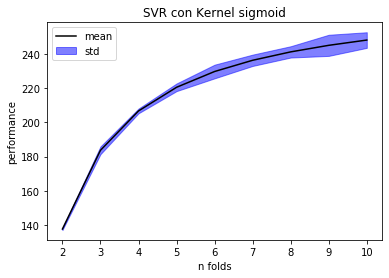

In [0]:
show_curve(est7,X,y,'SVR con Kernel sigmoid',mean_absolute_error)

**Almacenamiento de Modelos Entrenados**

In [0]:
from sklearn.externals import joblib  #Importando la libreria para almacenar mi modelo

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Almacenamiento de Estimadores

In [0]:
joblib.dump(est1, 'arbolRegresor_entrenado.pkl') # Guardo el modelo.
joblib.dump(est2, 'randomForest_entrenado.pkl')
joblib.dump(est6, 'gaussianRegressor_entrenado.pkl')

['gaussianRegressor_entrenado.pkl']

cargador de modelos

In [0]:
est1 = joblib.load('arbolRegresor_entrenado.pkl') # Carga del modelo.
est2 = joblib.load('randomForest_entrenado.pkl') # Carga del modelo.
est6 = joblib.load('gaussianRegressor_entrenado.pkl') # Carga del modelo.
# estimadorArbol.score(x_train, y_train) #Comprobacion del score del modelo

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Comprobacion del riesgo en los estimadores con mejor precision

In [0]:
print(type(X_test))

<class 'numpy.ndarray'>


In [0]:
prueba1=est1.predict(X_test)
print(np.argmin(prueba1),np.min(prueba1))
print(X_test[93])

93 0.0021108646609751193
[31.  1.  4.  7.  8.]


In [0]:
def demo(pruebas):
  pred1 = est1.predict(pruebas)
  pred2 = est2.predict(pruebas)
  pred3 = est6.predict(pruebas)

  resultado = (pred1[0]+pred2[0]+pred3[0])/3

  return print('El Porcentaje de riesgo asociado a esta persona es de:', resultado*100,'% Porciento')


Trabajando con la funcion para el porcentaje de riesgo

In [0]:
prueba2 = np.array([20.,  1.,  1.,  4.,  1.]).reshape(1,5)
demo(prueba2)

El Porcentaje de riesgo asociado a esta persona es de: 1.0179058958093017 % Porciento


# 7.Regresion Con DNN

Probando el modelo de regresion en este caso vamos a usar mis datos de columnas del dataset, pero primero mira

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [0]:
#Creamos nuestra red neuronal en este caso en una funcion
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[5]),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
  ])
  #Un optimizador diferente al Adam en este caso la velocidad de aprendizaje es de 0.001
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
#Creamos nuestra red neuronal en este caso en una funcion
def build_model2():
  model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[5]),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='elu'),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='linear')
  ])
  #Un optimizador diferente al Adam en este caso la velocidad de aprendizaje es de 0.001
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
#Prueba de la otra red neuronal
modelo1 = build_model2()
modelo1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               3072      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history1 = modelo1.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
#Creamos el dataframe
hist = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch
hist.tail()

loss  mean_absolute_error  ...  val_mean_squared_error  epoch
995  0.005470             0.031646  ...                0.005966    995
996  0.005471             0.031712  ...                0.005965    996
997  0.005474             0.031872  ...                0.005976    997
998  0.005472             0.031717  ...                0.006023    998
999  0.005475             0.031403  ...                0.005972    999

[5 rows x 7 columns]

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [COSTOS]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Error de Entrenamiento')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Error de Evaluacion')
  plt.ylim([0,0.05])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$COSTOS^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label=' Error de Entrenamiento')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Error de Evaluacion')
  plt.ylim([0.001,0.008])
  plt.legend()
  plt.show()

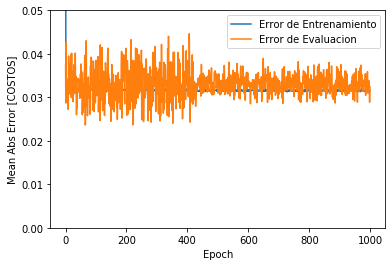

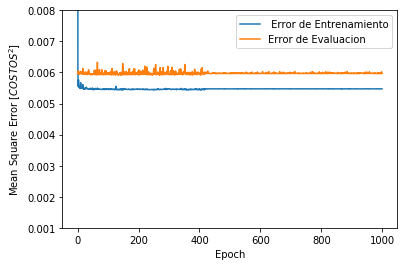

In [0]:
plot_history(history1)


...........

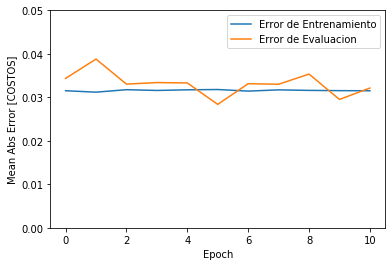

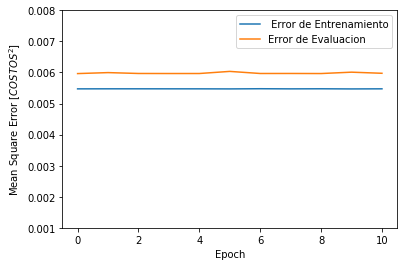

In [0]:
# modelo = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history1 = modelo1.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history1)

In [0]:
loss, mae, mse = modelo1.evaluate(X_test, y_test, verbose=1)

print("Evaluando usando el error medio absoluto: ", mae ," COSTO")
print("Evaluando usando el error cuadratico medio : ",mse," COSTO")

1406/1406 [==============================] - 0s 45us/sample - loss: 0.0053 - mean_absolute_error: 0.0307 - mean_squared_error: 0.0053
Evaluando usando el error medio absoluto:  0.030653149  COSTO
Evaluando usando el error cuadratico medio :  0.0052665793  COSTO


In [0]:
# modelo = keras.models.Sequential([
    
#     keras.layers.Flatten( input_shape=[5]),
#     keras.layers.Dense(256, activation=tf.nn.relu),
#     keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dense(64, activation=tf.nn.relu),
#     keras.layers.Dense(32, activation=tf.nn.relu),
#     keras.layers.Dense(16, activation='tanh'),
#     keras.layers.Dense(1, activation='linear') 
# ])
# modelo.summary()

In [0]:
# # model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# modelo.compile(optimizer=tf.train.AdamOptimizer(), 
#               loss='mae',
#               metrics=['mae'])
#Entrenamiento del modelo
# modelo.fit(X_train, y_train, epochs=15, batch_size=30,  verbose=1, validation_split=0.2)

In [0]:
#Instanciando la funcion
modelo = build_model()
modelo.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               3072      
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 33        
Total params: 177,665
Trainable params: 177,665
Non-trainable params: 0
_______________________________________________

Modelo e histograma 

In [0]:
# history = modelo.fit(X_train, y_train, epochs=1000, batch_size=30,  verbose=0, validation_split=0.2)
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = modelo.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  mean_absolute_error  ...  val_mean_squared_error  epoch
995  0.005537             0.031682  ...                0.005385    995
996  0.005537             0.032014  ...                0.005390    996
997  0.005536             0.031833  ...                0.005385    997
998  0.005535             0.031779  ...                0.005385    998
999  0.005537             0.032073  ...                0.005388    999

[5 rows x 7 columns]

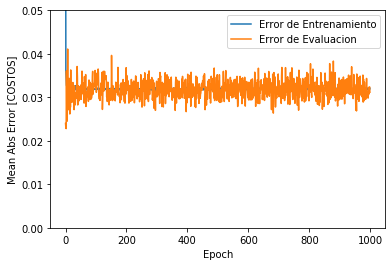

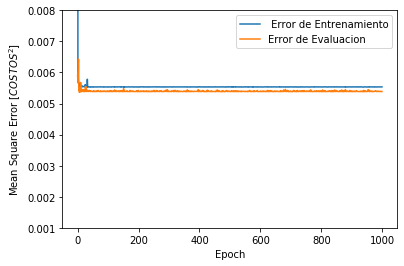

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [COSTOS]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Error de Entrenamiento')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Error de Evaluacion')
  plt.ylim([0,0.05])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$COSTOS^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label=' Error de Entrenamiento')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Error de Evaluacion')
  plt.ylim([0.001,0.008])
  plt.legend()
  plt.show()


plot_history(history)


............

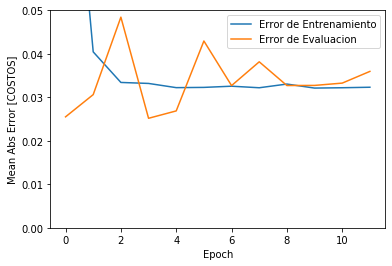

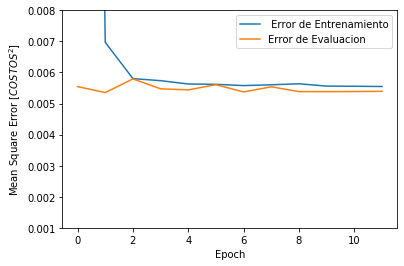

In [0]:
modelo = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = modelo.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = modelo.evaluate(X_test, y_test, verbose=2)

print("Evaluando usando el error medio absoluto: ", mae ," COSTO")
print("Evaluando usando el error cuadratico medio : ",mse," COSTO")

2812/2812 - 0s - loss: 0.0057 - mean_absolute_error: 0.0366 - mean_squared_error: 0.0057
Evaluando usando el error medio absoluto:  0.03658568  COSTO
Evaluando usando el error cuadratico medio :  0.0056742965  COSTO


**Almacenar Modelo**

In [0]:
# serializar el modelo a JSON
model_json = modelo1.to_json()
with open("nuevomodelo.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
modelo1.save_weights("nuevomodelo.h5")
print("Modelo Guardado!")

Modelo Guardado!


In [48]:
X_new= np.array([[ 20, 0,3,1,2]])
print(X_new.shape)

(1, 5)


In [49]:
#prediccion en este caso para la
predictions = loaded_model.predict(X_new)
print(predictions)


[[0.02613211]]


# **Cargar Modelo**

In [0]:
import tensorflow as tf
import keras

In [34]:
# cargar json y crear el modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Cargado modelo desde disco.")
#Compilado del modelo
loaded_model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mae', 'mse'])

Cargado modelo desde disco.


Probando si el modelo cargado es el correcto

In [42]:
loss, mae, mse = loaded_model.evaluate(X_test, y_test, verbose=2)

print("Evaluando usando el error medio absoluto: ", mae ," COSTO")
print("Evaluando usando el error cuadratico medio : ",mse," COSTO")

44/44 - 0s - loss: 0.0052 - mae: 0.0373 - mse: 0.0051
Evaluando usando el error medio absoluto:  0.037287212908267975  COSTO
Evaluando usando el error cuadratico medio :  0.005144340917468071  COSTO


# 8.Aplicando Algoritmos no supervisados

<p>Basados en lo aprendido en clase acerca de los algoritmos no supervisados, podriamos colocar un poco mas agudo el analisis, clasificando el riesgo por edades en este caso por grupos de edad, concluir con respecto a los grupos hallados ydefinir para ellos un rango de riesgo</p>

In [111]:
# print(X.shape,y.shape)
# print(X_test.shape,y_test.shape)
print(X_test[:,0].shape,y_test.shape)
print(type(X_test[:,0]),type(y_test))
print(y.shape)

(1406,) (1406,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(14060,)


Text(0, 0.5, 'Porcentaje de Riesgo')

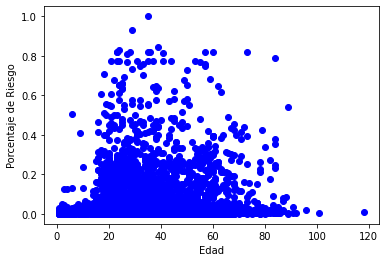

In [116]:
#Ca
plt.scatter(X[:,0], y, c="blue", cmap='rainbow') 
plt.xlabel("Edad")
plt.ylabel("Porcentaje de Riesgo")

Aplicamos el Kmeans para probar

In [136]:
X.shape

(14060, 5)

In [152]:
kmeans = KMeans(n_clusters=6)  
kmeans.fit(X)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

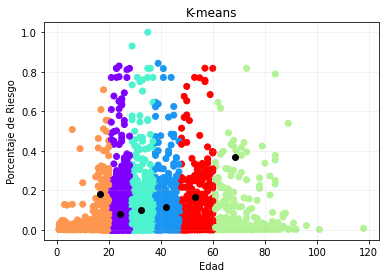

In [153]:
#Ploteamos la identificacion tomada por kmeans
plt.scatter(X[:,0],y, c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 
plt.title("K-means")
plt.xlabel("Edad")
plt.ylabel("Porcentaje de Riesgo")
plt.grid(alpha=0.2)

Aqui Mostramos el numero de clases que identifico y la cantidad de valores en cada rango de edad

In [155]:
print(kmeans.labels_)
import collections
clasificacion = collections.Counter(kmeans.labels_)
print(clasificacion)

[3 0 4 ... 0 2 4]
Counter({0: 4703, 2: 3323, 1: 2003, 4: 1928, 5: 1516, 3: 587})


# 9.Trabajando el problema de riesgo ahora si con el porcentaje 

In [0]:
from sklearn.externals import joblib  #Importando la libreria para almacenar mi modelo

In [16]:
est1 = joblib.load('arbolRegresor_entrenado.pkl') # Carga del modelo.
est2 = joblib.load('randomForest_entrenado.pkl') # Carga del modelo.
est6 = joblib.load('gaussianRegressor_entrenado.pkl') # Carga del modelo.
# estimadorArbol.score(x_train, y_train) #Comprobacion del score del modelo

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Queremos conocer un porcentaje de riesgo que podamos dar con respecto a una persona, para asegurar en un soat, asi que vamos a usar los resultados de los estimadores para hacer un promedio para entregar este resultado como el porcentaje de riesgo a una aseguradora y esta pueda calcular si de esta persona se puede generar rentabilidad.

In [0]:
def demo(pruebas):
  pred1 = est1.predict(pruebas)
  pred2 = est2.predict(pruebas)
  pred3 = est6.predict(pruebas)

  resultado = (pred1[0]+pred2[0]+pred3[0])/3

  return print('El Porcentaje de riesgo asociado a esta persona es de:', resultado*100,'% Porciento')

Recibimos en este caso 3 datos que son: 


*   Edad del solicitante
*   El tipo de vehiculo que conduce o conducira
*   La direccion directa que tiene con el vehiculo, es decir si es conductor o pasajero o si tiene cicla y usa una.

Luego de pasar estos variables usando nuestras estimaciones arriba concluimos con respecto a lo obtenido otorgando un porcentaje de riesgo que se puede emplear en la formula de calculo de un costo al usuario.



In [0]:
pruebate = np.array([[60., 0., 1., 6., 11.]])

In [71]:
prueba2 = np.array([20.,  1.,  0.,  4.,  1.]).reshape(1,5)
demo(prueba2)

El Porcentaje de riesgo asociado a esta persona es de: 29.581121266266546 % Porciento


In [52]:
prueba1 = np.array([60.,  0.,  2.,  6.,  11.]).reshape(1,5)
demo(prueba1)

El Porcentaje de riesgo asociado a esta persona es de: 65.37043636386612 % Porciento


In [72]:
demo(pruebate)

El Porcentaje de riesgo asociado a esta persona es de: 70.81834855067396 % Porciento
